In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, metrics, model_selection

#from data import *
from helpers import *


In [3]:
def merge_files(files):
    init = files[0]
    files_ = files[1::]
    
    X,y = preprocess(init,columns)
    for file in files_:
        X1,y1 = preprocess(file,columns)
        X = X.append(X1, ignore_index = True)
        y = y.append(y1, ignore_index = True)
    return X,y

In [4]:
def powerset(s,res):
    x = len(s)
    for i in range(1,1 << x):
        res.append([s[j] for j in range(x) if (i & (1 << j))])

In [5]:
all_files = [
         '../labeled_dataset/GL53_UP_1A.csv',
         '../labeled_dataset/GL53_UP_2A.csv',
         '../labeled_dataset/GL53_UP_3A.csv',
         '../labeled_dataset/GL57_DN_3A.csv',
         '../labeled_dataset/GL57_DN_2A.csv',
         '../labeled_dataset/GL58_UP_1A.csv',
         '../labeled_dataset/GL58_UP_2A.csv',
         '../labeled_dataset/GL58_UP_3A.csv',
         '../labeled_dataset/GL59_DN_1A.csv',
         '../labeled_dataset/GL59_DN_2A.csv',
         '../labeled_dataset/GL59_DN_3A.csv']

all_train_files = []
powerset(all_files,all_train_files)

### Which train_files gives the best mean metric on test_files

In [151]:
columns=['B530-H', 'B675-H','B572-H','Width']

train_files_max_metric = 0

for train_files in all_train_files:
    test_files = list(set(all_files) - set(train_files))
    X,y = merge_files(train_files)  
    X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)

    all_test_metrics = []
    for test_file in test_files:
        X_test_file,y_test_file = preprocess(test_file,columns)
        y_pred_file = model.predict(X_test_file)
        metric = metrics.balanced_accuracy_score(y_test_file, y_pred_file)
        all_test_metrics.append(metric)
    mean_metric = np.mean(all_test_metrics)
    if(mean_metric > train_files_max_metric ):
        train_files_max_metric = mean_metric
        print(train_files)


['../labeled_dataset/GL53_UP_1A.csv']
['../labeled_dataset/GL53_UP_3A.csv']
['../labeled_dataset/GL57_DN_3A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL57_DN_3A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_2A.csv', '../labeled_dataset/GL57_DN_3A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL57_DN_2A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_3A.csv', '../labeled_dataset/GL57_DN_2A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_2A.csv', '../labeled_dataset/GL57_DN_3A.csv', '../labeled_dataset/GL57_DN_2A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_2A.csv', '../labeled_dataset/GL53_UP_3A.csv', '../labeled_dataset/GL57_DN_3A.csv', '../labeled_dataset/GL57_DN_2A.csv']
['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_2A.csv', '../labeled_dataset/GL53_UP_3A.csv', '../labeled_dataset/GL57_DN_2A.csv', '../labeled_dataset/GL58_UP_

/usr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### The idea will be to take the smallest set that gives the best results

In [6]:
#train_files = ['../labeled_dataset/GL59_DN_2A.csv','../labeled_dataset/GL53_UP_1A.csv','../labeled_dataset/GL58_UP_1A.csv','../labeled_dataset/GL59_DN_3A.csv','../labeled_dataset/GL57_DN_2A.csv']
train_files = ['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_2A.csv', '../labeled_dataset/GL53_UP_3A.csv', '../labeled_dataset/GL57_DN_2A.csv', '../labeled_dataset/GL59_DN_1A.csv']
test_files = list(set(all_files) - set(train_files))
columns=['B530-H', 'B675-H','B572-H','Width']
#columns=['FSC-H','SSC-H','B530-H','B572-H','B675-H','FSC-A','SSC-A','B530-A','B572-A','B675-A','Width']

X,y = merge_files(train_files)  

X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)
kfold_cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

### Decision Tree

In [165]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [171]:
# Example of a cross-validation scenario 
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.890 (0.009)
Balanced Accuracy: 0.888 (0.010)
F1: 0.872 (0.010)
AUC: 0.888 (0.010)
Accuracy: 0.885
Balanced Accuracy: 0.883
F1: 0.866
AUC: 0.883


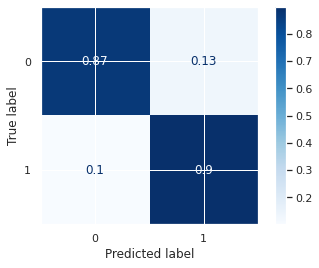

In [172]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

### Random Forest

In [28]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [30]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [31]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [176]:
forest =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [177]:
forest = RandomForestClassifier(n_estimators=10, random_state= 0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [178]:
y_pred = forest.predict(X_test)

In [180]:
forest.feature_importances_

array([0.40149726, 0.28268492, 0.14244752, 0.1733703 ])

In [181]:
forest.predict(X_test)

array([1, 1, 1, ..., 2, 2, 2])

In [182]:
forest.predict_proba(X_test)

array([[0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0.1, 0.9],
       [0.1, 0.9]])

# SVM

In [23]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['balanced_accuracy', 'f1','roc_auc']

In [24]:


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print() 
    
    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s' % score
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for balanced_accuracy



KeyboardInterrupt: 